In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from keras import layers

In [2]:
df = pd.read_csv("C:/AI_study/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df['activity'].value_counts()

rowing                     480
basketBall                 480
cyclingVertical            480
runningTreadmill           480
lyingBack                  480
sitting                    480
walkingLot                 480
walkingTreadmillIncline    480
cyclingHorizontal          480
movingInElevator           480
standingInElevatorStill    480
crossTrainer               480
walkingTreadmillFlat       480
stepper                    480
standing                   480
jumping                    480
ascendingStairs            480
decendingStairs            480
lyingRigh                  480
Name: activity, dtype: int64

In [4]:
df = df.drop('people', axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'activity' 열에 Label Encoding 적용
df['activity_encoded'] = label_encoder.fit_transform(df['activity'])

# 변환된 값 확인 (선택 사항)
print(df[['activity', 'activity_encoded']].head())

df = df.drop('activity', axis=1)

  activity  activity_encoded
0  sitting                12
1  sitting                12
2  sitting                12
3  sitting                12
4  sitting                12


In [6]:
# 각 activity 값과 대응되는 숫자 확인
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(label_mapping)

{'ascendingStairs': 0, 'basketBall': 1, 'crossTrainer': 2, 'cyclingHorizontal': 3, 'cyclingVertical': 4, 'decendingStairs': 5, 'jumping': 6, 'lyingBack': 7, 'lyingRigh': 8, 'movingInElevator': 9, 'rowing': 10, 'runningTreadmill': 11, 'sitting': 12, 'standing': 13, 'standingInElevatorStill': 14, 'stepper': 15, 'walkingLot': 16, 'walkingTreadmillFlat': 17, 'walkingTreadmillIncline': 18}


In [7]:
df.isnull().values.any()

False

In [8]:
df.shape

(9120, 271)

In [9]:
import numpy as np
from collections import Counter

# split_sequence 함수 (수정됨)
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [10]:
# 실제 데이터 적용
sequence = df.drop('activity_encoded', axis=1).values  # 수치형 데이터
labels = df['activity_encoded'].values  # 범주형 레이블 'Rings_binned'

# 시퀀스 분리
n_steps = 7
X, y = split_sequence(sequence, labels, n_steps)

In [11]:
print(X)
print(y)

[[[ 7.97571440e+00  8.16050000e+00  7.68230000e+00 ...  6.77872244e-07
    8.23329973e-04  3.67289638e-02]
  [ 7.97824960e+00  8.17630000e+00  7.84720000e+00 ...  7.03230184e-07
    8.38588209e-04  3.47471027e-01]
  [ 7.97089360e+00  8.08600000e+00  7.84700000e+00 ...  6.26822162e-07
    7.91721013e-04  4.55789434e-02]
  ...
  [ 7.90892960e+00  8.13050000e+00  7.83220000e+00 ...  6.85342282e-07
    8.27854022e-04  2.58428500e-01]
  [ 7.96554400e+00  8.13040000e+00  7.86910000e+00 ...  7.60325931e-07
    8.71966703e-04  1.62002946e-02]
  [ 7.92315920e+00  8.04820000e+00  7.85430000e+00 ...  7.29960663e-07
    8.54377354e-04 -9.07416331e-02]]

 [[ 7.97824960e+00  8.17630000e+00  7.84720000e+00 ...  7.03230184e-07
    8.38588209e-04  3.47471027e-01]
  [ 7.97089360e+00  8.08600000e+00  7.84700000e+00 ...  6.26822162e-07
    7.91721013e-04  4.55789434e-02]
  [ 7.93841200e+00  8.10830000e+00  7.69010000e+00 ...  8.01124455e-07
    8.95055560e-04  2.40689753e-01]
  ...
  [ 7.96554400e+00  8.1

In [12]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [13]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((5832, 7, 270), (1823, 7, 270), (5832,), (1823,), (1458, 7, 270), (1458,))

In [15]:
from tensorflow.keras.utils import to_categorical

trainy_one_hot = to_categorical(y_train)
val_one_hot = to_categorical(y_val)
testy_one_hot = to_categorical(y_test)

trainy_one_hot.shape, val_one_hot.shape, testy_one_hot.shape

((5832, 19), (1458, 19), (1823, 19))

In [16]:
import keras

n_classes = 19
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=["categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]


history = model.fit(
    X_train,
    trainy_one_hot,
    validation_split=0.2,
    epochs=150,
    batch_size=64,
    callbacks=callbacks,
    validation_data=(X_val, val_one_hot)
)

model.evaluate(X_test, testy_one_hot, verbose=1)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 7, 270)]     0                                            
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 7, 270)       1109262     input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 7, 270)       0           multi_head_attention[0][0]       
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 7, 270)       540         dropout[0][0]                

73/73 [==============================] - 15s 184ms/step - loss: 3.1284 - categorical_accuracy: 0.5314 - val_loss: 0.4616 - val_categorical_accuracy: 0.8749
Epoch 2/150
73/73 [==============================] - 16s 224ms/step - loss: 0.9022 - categorical_accuracy: 0.7976 - val_loss: 0.2976 - val_categorical_accuracy: 0.9220
Epoch 3/150
73/73 [==============================] - 20s 280ms/step - loss: 0.5211 - categorical_accuracy: 0.8825 - val_loss: 0.1637 - val_categorical_accuracy: 0.9632
Epoch 4/150
73/73 [==============================] - 19s 261ms/step - loss: 0.3833 - categorical_accuracy: 0.9119 - val_loss: 0.1108 - val_categorical_accuracy: 0.9692
Epoch 5/150
73/73 [==============================] - 14s 198ms/step - loss: 0.2520 - categorical_accuracy: 0.9297 - val_loss: 0.0403 - val_categorical_accuracy: 0.9889
Epoch 6/150
73/73 [==============================] - 12s 168ms/step - loss: 0.1625 - categorical_accuracy: 0.9599 - val_loss: 0.0229 - val_categorical_accuracy: 0.9931
Epoc

[0.023010915145277977, 0.9956116080284119]

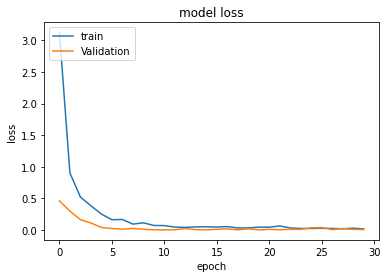

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

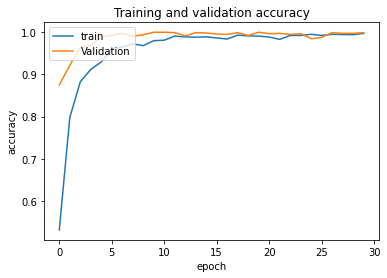

In [21]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

[[96  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 95  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 96  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 96  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 96  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 96  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 96  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 96  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 96  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 93  0  0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 96  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 96  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 95  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 96  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  1 94  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0 95  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

<AxesSubplot:>

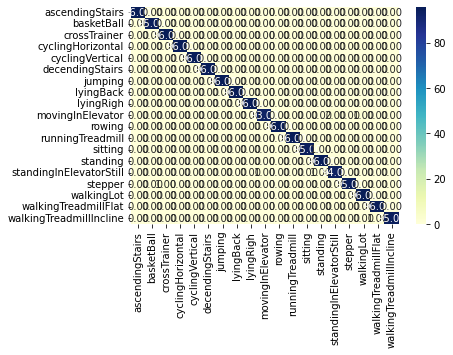

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score
import seaborn as sns

predy=model.predict(X_test)
predy=np.argmax(predy, axis=-1)
LABELS = [
    'ascendingStairs', 'basketBall', 'crossTrainer', 'cyclingHorizontal', 
    'cyclingVertical', 'decendingStairs', 'jumping', 'lyingBack', 
    'lyingRigh', 'movingInElevator', 'rowing', 'runningTreadmill', 
    'sitting', 'standing', 'standingInElevatorStill', 'stepper', 
    'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline'
]
cm=confusion_matrix(y_test,predy)
print(cm)
print(accuracy_score(y_test,predy))
print(f1_score(y_test,predy, average='weighted'))
print(classification_report(y_test,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')